# vtpdetect


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 2254
download_chandra_obsid 2254 --exclude evt2,osol,vvref,eph1
chandra_repro 2254 out=`pwd` clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      229 Mb  ####################            3 s  83370.6 kb/s
  asol     fits       20 Mb  ####################          < 1 s  92741.6 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  54090.4 kb/s
  stat     fits        3 Mb  ####################          < 1 s  55708.4 kb/s
  aqual    fits        1 Mb  ####################          < 1 s  36975.7 kb/s
  bias     fits      494 Kb  ####################          < 1 s  25172.2 kb/s
  bias     fits      433 Kb  ####################          < 1 s  15226.1 kb/s
  bias     fits      431 Kb  ####################          < 1 s  14952.1 kb/s
  bias     fits      430 Kb  ####################          < 1 s  19510.3 kb/s
  bias     fits      429 Kb  ####################          < 1 s  12897.3 kb/s
  bias     fits      427 Kb  ####################    

In [3]:
dmcopy "acisf02254_repro_fov1.fits[ccd_id=0:3]" s3.fov clob+
dmcopy "acisf02254_repro_evt2.fits[ccd_id=0:3,energy=500:7000,sky=region(s3.fov)]" s3_evt2.fits clob+


[1] 61258
[1]+  Done                    ds9 s3_evt2.fits -pan to 4200 4350 physical -bin factor 2 -scale log -saveimage png ds9_01.png


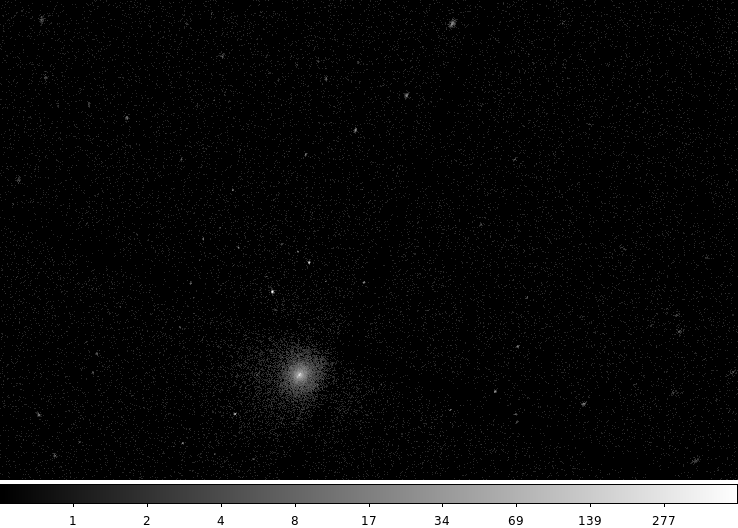

In [4]:
ds9 s3_evt2.fits \
  -pan to 4200 4350 physical \
  -bin factor 2 \
  -scale log \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

## Run vtpdetect

In [5]:
punlearn vtpdetect
pset vtpdetect infile=s3_evt2.fits
pset vtpdetect outfile=s3_src.fits
vtpdetect mode=h clob+


[1] 61337
[1]+  Done                    ds9 s3_evt2.fits -pan to 4200 4350 physical -bin factor 2 -scale log -region s3_src.fits -saveimage png ds9_02.png


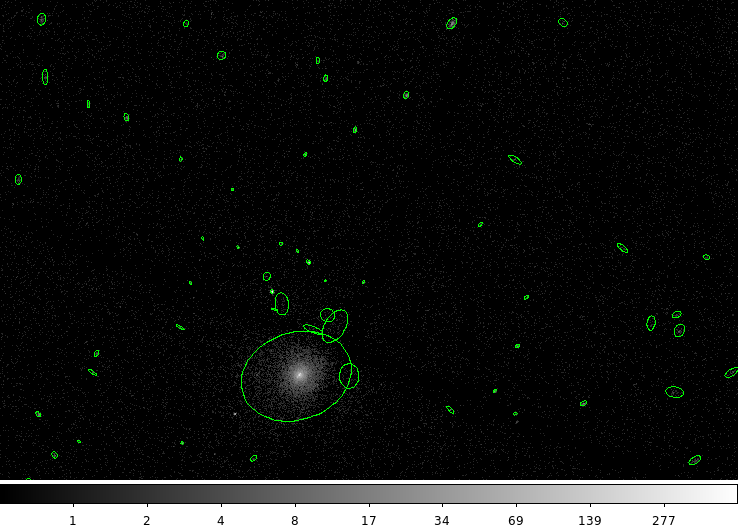

In [6]:
ds9 s3_evt2.fits \
  -pan to 4200 4350 physical \
  -bin factor 2 \
  -scale log \
  -region s3_src.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

[1] 61404
[1]+  Done                    ds9 s3_evt2.fits -pan to 4200 4350 physical -bin factor 2 -scale log -region s3_src.fits"[src_region]" -saveimage png ds9_03.png


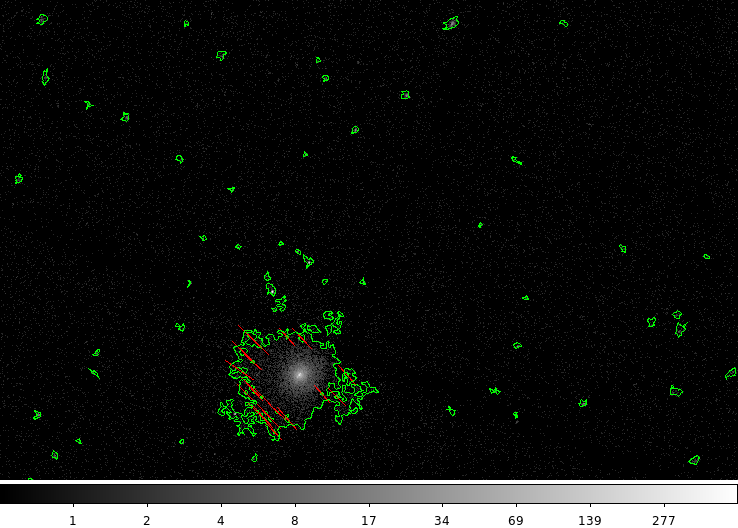

In [7]:
ds9 s3_evt2.fits \
  -pan to 4200 4350 physical \
  -bin factor 2 \
  -scale log \
  -region s3_src.fits"[src_region]" \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

[1] 336
[1]+  Done                    ds9 s3_evt2.fits -pan to 4200 4350 physical -bin factor 2 -scale log -region s3_src_include_only.fits"[src_region]" -saveimage png ds9_04.png


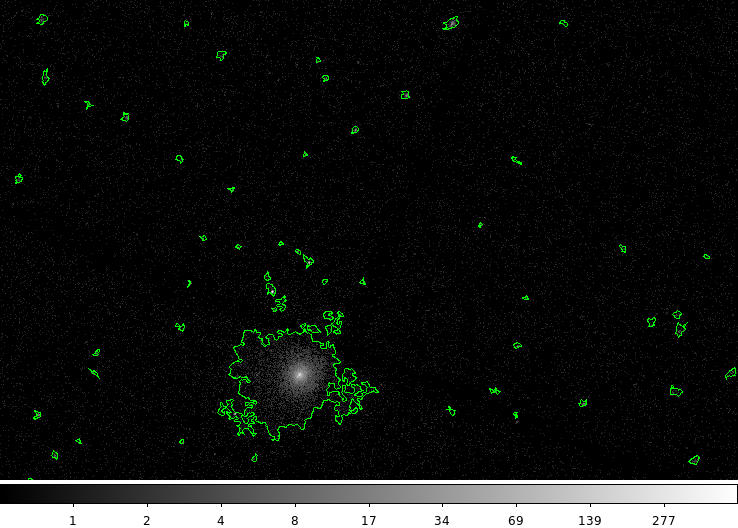

In [8]:
dmcopy "s3_src.fits[src_region][shape=Polygon]" s3_src_include_only.fits clob+

ds9 s3_evt2.fits \
  -pan to 4200 4350 physical \
  -bin factor 2 \
  -scale log \
  -region s3_src_include_only.fits"[src_region]" \
  -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit

display < ds9_04.png

## Inc exposure map

In [9]:
fluximage s3_evt2.fits s3 clob+ bin=2

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf02254_000N001_asol1.fits found.
Bad-pixel file acisf02254_repro_bpix1.fits found.
Mask file acisf02254_000N004_msk1.fits found.

The output images will have 1367 by 1368 pixels, pixel size of 0.984 arcsec,
    and cover x=2786.5:5520.5:2,y=2760.5:5496.5:2.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 2254
Creating 4 instrument maps for obsid 2254
Creating 4 exposure maps for obsid 2254
Combining 4 exposure maps for obsid 2254
Thresholding data for obsid 2254
Exposure-correcting image for obsid 2254

The following files were created:

 The clipped counts image is:
     s3_broad_thresh.img

 The clipped exposure map is:
     s3_broad_thresh.expmap

 The exposure-corrected image is:
     s3_broad_flux.img



In [10]:
pset vtpdetect expfile=s3_broad_thresh.expmap
pset vtpdetect outfile=s3_src_with_exp.fits
vtpdetect mode=h clob+


[1] 733
[1]+  Done                    ds9 s3_evt2.fits -bin factor 1 -zoom 1 -scale log -region s3_src_with_exp.fits s3_evt2.fits -scale log -region s3_src_with_exp.fits"[src_region]" -saveimage png ds9_05.png


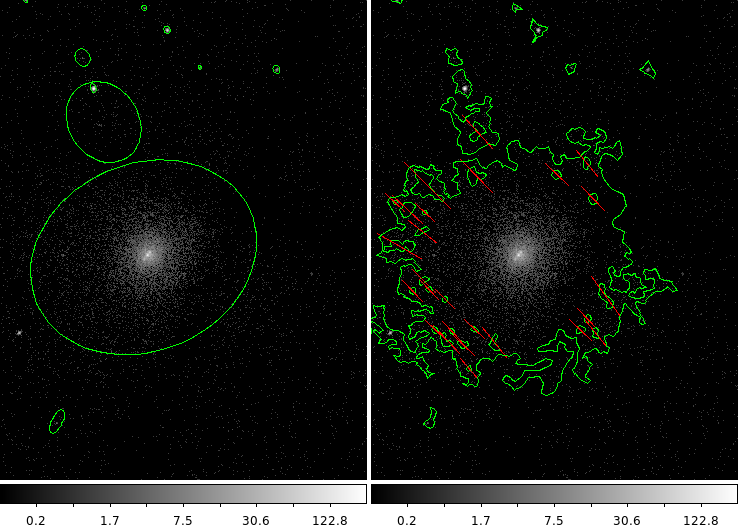

In [11]:
ds9 s3_evt2.fits \
  -bin factor 1 \
  -zoom 1 \
  -scale log \
  -region s3_src_with_exp.fits \
  s3_evt2.fits \
  -scale log \
  -region s3_src_with_exp.fits"[src_region]" \
  -saveimage png ds9_05.png &
sleep 10
xpaset -p ds9 quit

display < ds9_05.png

# Cleanup

In [12]:
/bin/rm -rf 2254 
/bin/rm -f acisf* pcadf* 